<a href="https://colab.research.google.com/github/M-ballabio1/DataScience_ML_DL-projects/blob/main/DeepLearning%20Projects/2.CNN%20-%20Image_Classification_mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

     |████████████████████████████████| 3.6 MB 12.3 MB/s 
     |████████████████████████████████| 1.9 MB 40.7 MB/s 
     |████████████████████████████████| 206 kB 47.4 MB/s 
     |████████████████████████████████| 961 kB 31.2 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
     |████████████████████████████████| 3.5 MB 42.6 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=3bb689d84a5d0416f5688678184dde1da7510e4fb963339bef16555f8abe5694
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=9f5089fa9f0ea65ee6cb54163b1cfe4ee49311a7e0a5ccd5253831eff6db8efc
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.regularizers import l2
import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = ('/content/drive/MyDrive/All_Mushroom_Data')
data_dir = pathlib.Path(data_dir)

In [ ]:
import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir = data_dir
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  Cantharellus
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/311774.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/415194.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/537046.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/395637.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/578328.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/121802.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/153245.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/20143.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/154822.jpg  is not a valid image file
file  /content/drive/MyDrive/All_Mushroom_Data/Cantharellus/198859.jpg  is not

/content/drive/MyDrive/All_Mushroom_Data/Boletus_edulis/21068.jpg


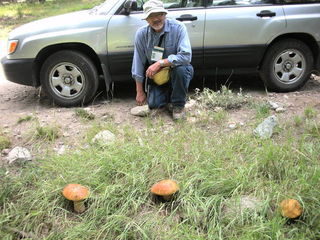

In [ ]:
Boletus_edulis = list(data_dir.glob('Boletus_edulis/*'))
print(Boletus_edulis[0])
PIL.Image.open(str(Boletus_edulis[0]))

In [ ]:
Batch_size =16
Img_height=160
Img_width=160

In [ ]:
train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/All_Mushroom_Data',
    validation_split=0.15,
    seed=123,
    subset="training",
    batch_size=Batch_size,
    image_size=(Img_height,Img_width))
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/All_Mushroom_Data',
    validation_split=0.15,
    seed=123,
    subset="validation",
    batch_size=Batch_size,
    image_size=(Img_height,Img_width))

Found 2748 files belonging to 5 classes.
Using 2336 files for training.
Found 2748 files belonging to 5 classes.
Using 412 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Amanita_bisporigera', 'Amanita_muscaria', 'Boletus_edulis', 'Cantharellus', 'Russula_mariae']


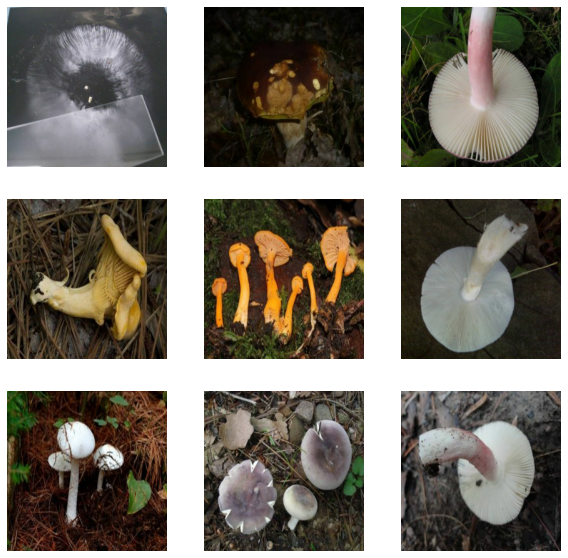

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(Img_height, Img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes,activation='softmax')
])

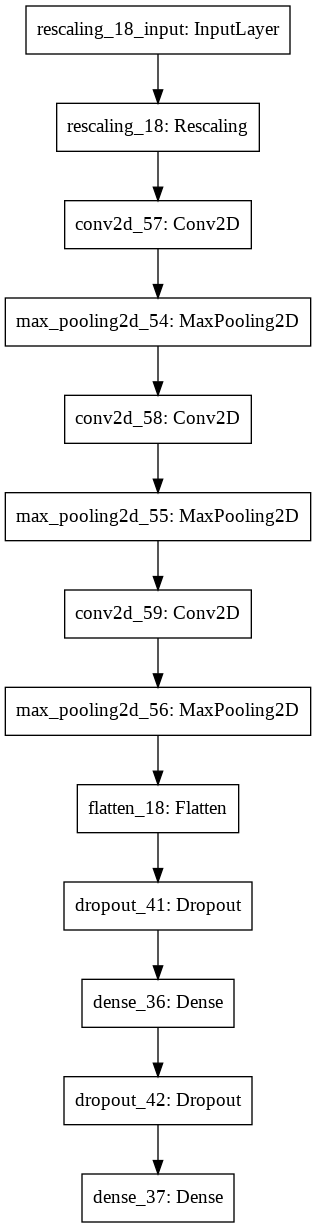

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

In [ ]:
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_19 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 32, 32, 64)      

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
Epochs=12
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=Epochs
)
model.save_weights('first_try.h5')

Epoch 1/12


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


146/146 [==============================] - 351s 2s/step - loss: 1.3348 - accuracy: 0.4696 - val_loss: 1.1090 - val_accuracy: 0.5752
Epoch 2/12
146/146 [==============================] - 8s 51ms/step - loss: 1.0867 - accuracy: 0.5783 - val_loss: 1.0292 - val_accuracy: 0.5850
Epoch 3/12
146/146 [==============================] - 8s 51ms/step - loss: 1.0382 - accuracy: 0.5856 - val_loss: 0.9839 - val_accuracy: 0.6165
Epoch 4/12
146/146 [==============================] - 8s 51ms/step - loss: 0.9322 - accuracy: 0.6331 - val_loss: 0.9526 - val_accuracy: 0.6019
Epoch 5/12
146/146 [==============================] - 8s 50ms/step - loss: 0.8441 - accuracy: 0.6772 - val_loss: 0.8495 - val_accuracy: 0.6650
Epoch 6/12
146/146 [==============================] - 8s 50ms/step - loss: 0.7387 - accuracy: 0.7239 - val_loss: 0.8899 - val_accuracy: 0.7015
Epoch 7/12
146/146 [==============================] - 7s 49ms/step - loss: 0.6671 - accuracy: 0.7594 - val_loss: 0.8160 - val_accuracy: 0.6893
Epoch 8/12

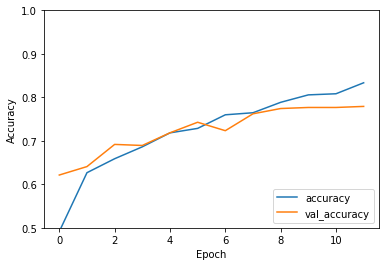

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
t = time.time()

export_path_keras = "./model1.h5"
print(export_path_keras)

model.save(export_path_keras)

./model1.h5


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,120,120,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
image = gr.inputs.Image(shape=(120,120))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://51998.gradio.app
Interface loading below...
